In [7]:
from datasets import * 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = TEPSlidingWindowDataset(100, 1000, "dataset/Torch/TEP_FaultFree_Training.torch", "dataset/Torch/TEP_Faulty_Training.torch")

52490


Text(0.5, 1.0, 'Continuous Wavelet Transform (Scaleogram)')

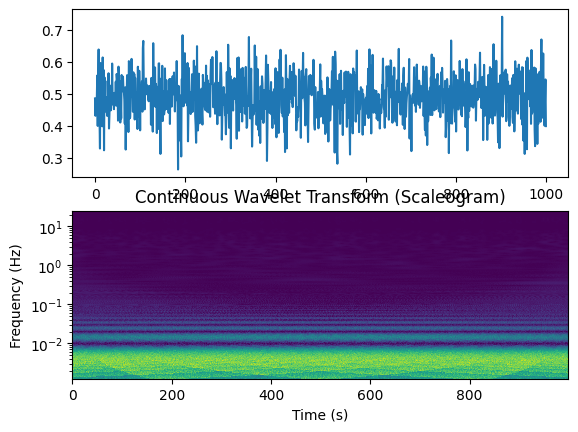

In [23]:
print(len(dataset))
x, y = dataset[0]
x = x.detach().cpu().numpy()
x = x[:, 4]
fig, axs = plt.subplots(2)
axs[0].plot(x)

wavelet = "cmor2.5-2.5"
widths = np.geomspace(1, 20000, num=1000)
sampling_period = np.ones(x.shape)/10
cwtmatr, freqs = pywt.cwt(x, widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

pcm = axs[1].pcolormesh(np.arange(x.shape[0]), freqs, cwtmatr)
axs[1].set_yscale("log")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Frequency (Hz)")
axs[1].set_title("Continuous Wavelet Transform (Scaleogram)")
# fig.colorbar(pcm, ax=axs[1])